## ThinkDSP

This notebook contains an example from Chapter 10: Signals and Systems

Copyright 2015 Allen Downey

License: [Creative Commons Attribution 4.0 International](http://creativecommons.org/licenses/by/4.0/)

In [2]:
# Get thinkdsp.py

import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from thinkdsp import decorate

## LTI System Theory

This notebook contains one of the coolest examples in Think DSP.  It uses LTI system theory to characterize the acoustics of a recording space and simulate the effect this space would have on the sound of a violin performance.

I'll start with a recording of a gunshot:

In [4]:
if not os.path.exists('180960__kleeb__gunshot.wav'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/180960__kleeb__gunshot.wav

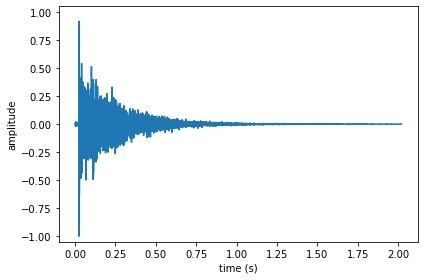

In [5]:
from thinkdsp import read_wave

response = read_wave('180960__kleeb__gunshot.wav')

start = 0.12
response = response.segment(start=start)
response.shift(-start)

response.plot()
decorate(xlabel='Time (s)', ylabel='Amplitude')

If you play this recording, you can hear the initial shot and several seconds of echos.

In [6]:
response.make_audio()

This wave records the "impulse response" of the room where the gun was fired.

Now let's load a recording of a violin performance:

In [7]:
if not os.path.exists('92002__jcveliz__violin-origional.wav'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/92002__jcveliz__violin-origional.wav

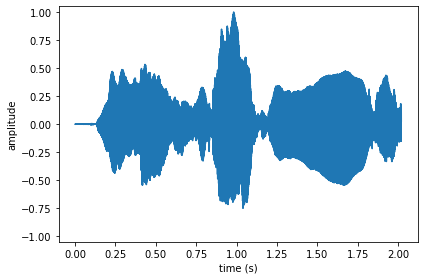

In [8]:
wave = read_wave('92002__jcveliz__violin-origional.wav')
wave.truncate(len(response))
wave.normalize()
wave.plot()
decorate(xlabel='Time (s)', ylabel='Amplitude')

And listen to it:

In [9]:
wave.make_audio()

Now we can figure out what the violin would sound like if it was played in the room where the gun was fired.  All we have to do is convolve the two waves:

In [10]:
output = wave.convolve(response)
output.normalize()

Here's what it looks like:

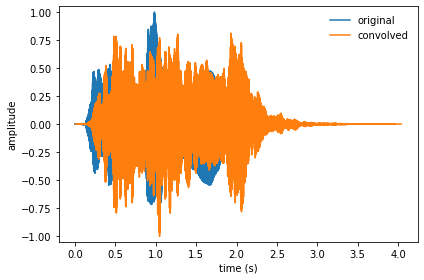

In [11]:
wave.plot(label='original')
output.plot(label='convolved')
decorate(xlabel='Time (s)', ylabel='Amplitude')

And here's what it sounds like:

In [12]:
output.make_audio()

If you think this example is black magic, you are not alone.   But there is a good reason why this works, and I do my best to explain it in Chapter 10.  So stay tuned.

I'd like to thank jcveliz and kleeb for making these recordings available from freesound.org.